Elastic Net Regression

In [2]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('/content/houseprice.csv')

In [49]:
df.shape

(500, 7)

In [50]:
df.head()

,OverallQual,OverallCond,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageArea,SalePrice
0,7,5,706,1710,3,548,208500
1,6,8,978,1262,3,460,181500
2,7,5,486,1786,3,608,223500
3,7,5,216,1717,3,642,140000
4,8,5,655,2198,4,836,250000


In [51]:
df.tail()

,OverallQual,OverallCond,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageArea,SalePrice
495,4,5,495,720,2,0,34900
496,8,5,1231,3228,4,546,430000
497,7,6,329,1820,4,240,184000
498,5,7,450,899,3,288,130000
499,5,7,111,912,2,297,120000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   500 non-null    int64
 1   OverallCond   500 non-null    int64
 2   BsmtFinSF1    500 non-null    int64
 3   GrLivArea     500 non-null    int64
 4   BedroomAbvGr  500 non-null    int64
 5   GarageArea    500 non-null    int64
 6   SalePrice     500 non-null    int64
dtypes: int64(7)
memory usage: 27.5 KB


In [19]:
df.describe()

,OverallQual,GrLivArea,GarageArea,SalePrice
count,500.000000,500.00000,500.000000,500.000000
mean,6.140000,1515.75800,462.762000,182517.004000
std,1.356496,497.43392,207.759383,78602.740258
min,1.000000,520.00000,0.000000,34900.000000
25%,5.000000,1148.50000,312.000000,128425.000000
50%,6.000000,1463.00000,470.500000,165550.000000
75%,7.000000,1767.25000,576.000000,216625.000000
max,10.000000,3608.00000,1166.000000,555000.000000


In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,OverallQual,GrLivArea,GarageArea,SalePrice
OverallQual,1.000000,0.624370,0.625118,0.809258
GrLivArea,0.624370,1.000000,0.486134,0.755993
GarageArea,0.625118,0.486134,1.000000,0.684838
SalePrice,0.809258,0.755993,0.684838,1.000000


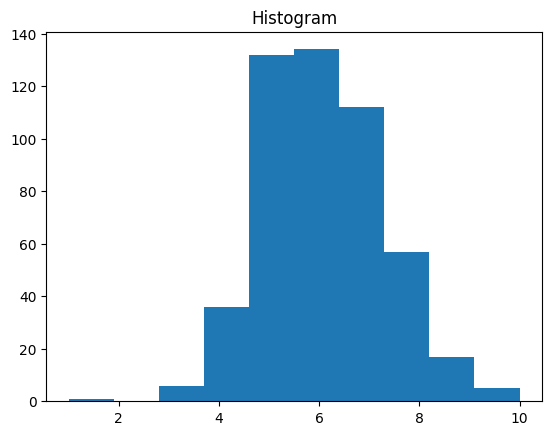

In [55]:
import matplotlib.pyplot as plt
plt.hist(df["OverallQual"])
plt.title("Histogram")
plt.show()

In [56]:
df.columns

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'GrLivArea', 'BedroomAbvGr',
       'GarageArea', 'SalePrice'],
      dtype='object')

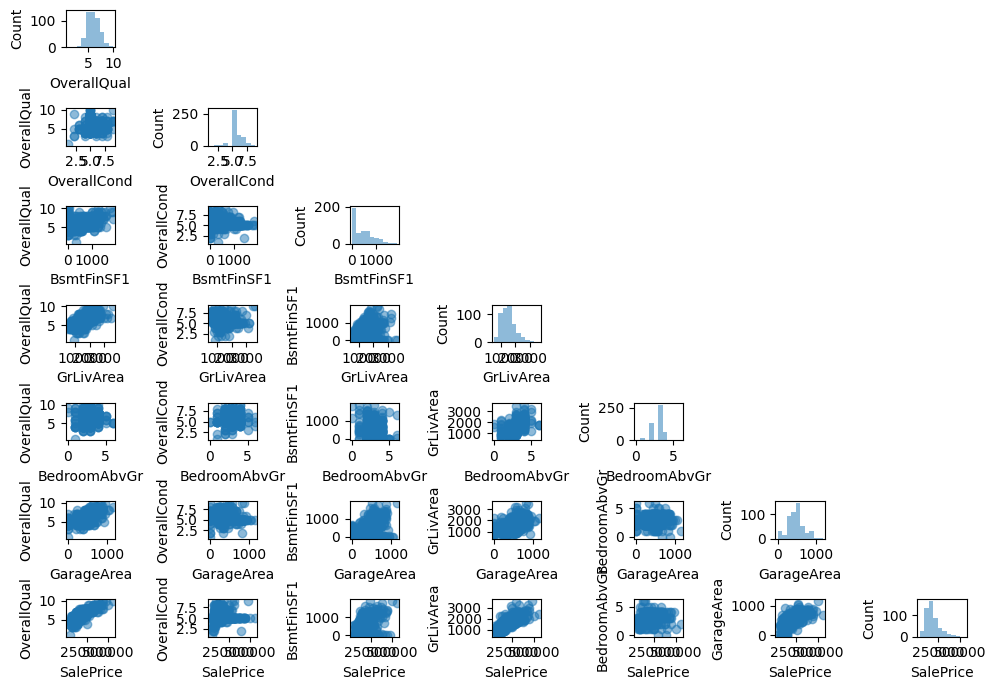

In [59]:
from mlxtend.plotting import scatterplotmatrix
cols = ['OverallQual', 'OverallCond', 'BsmtFinSF1', 'GrLivArea', 'BedroomAbvGr',
       'GarageArea', 'SalePrice']
scatterplotmatrix(df[cols].values, figsize=(10,7),
                     names= cols, alpha= 0.5)
plt.tight_layout()
plt.show()

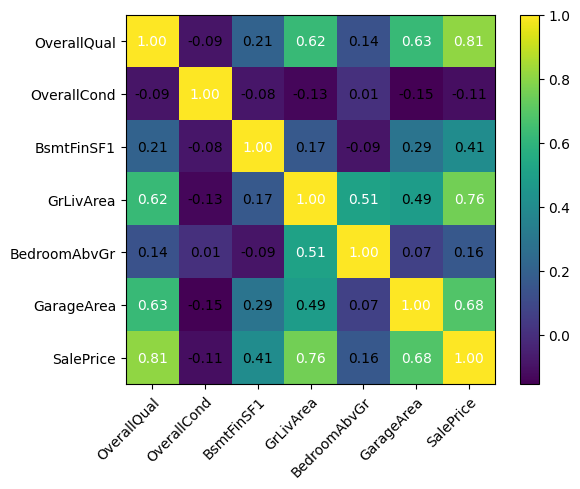

In [60]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [61]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y,
                                                     random_state=999)

In [63]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [64]:
enet.fit(X_train, y_train)

ElasticNet()

In [65]:
y_pred = enet.predict(X_test)

In [66]:
y_pred

array([178776.40465059, 326215.22005845, 288017.86198698, 242345.14619282,
       171111.92866789, 219410.73901894, 179874.7484989 , 201012.08251321,
       197480.91182647, 260910.2625983 , 216198.46934422, 181683.66848435,
       186908.31789698, 332569.37238637, 334475.52002347, 259369.14945615,
       229508.65801333, 188288.90372457, 130538.33467503, 155137.52013823,
       277362.18538345, 178316.14604306, 184325.68886542,  98695.41581956,
       155423.43791912, 210767.16602499, 102255.14918617, 165181.15054263,
       226986.66508162, 185514.63441084, 330457.51819143, 178201.82711934,
       129799.32556419, 117311.30470036, 204099.22846797, 371052.97678553,
       139541.43752093, 204399.07840842, 218360.66305151,  92801.50847817,
       257150.29284823, 171771.25623236, 161349.09658547, 278348.11574386,
       135401.78376499, 229701.96260651, 104595.73947272, 206036.16588444,
        85837.68547971, 212804.67003891, 184335.02760767,  63778.70358179,
       155280.05539815, 1

In [68]:
print ("Slope : %.2f" % enet.coef_[0])

Slope : 13743.38


In [70]:
print ("Intercept : %.2f" % enet.intercept_)

Intercept : -69297.02


In [71]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1253926012.169404

In [73]:
# RMSD
np.sqrt(mean_squared_error(y_test, y_pred))

35410.81772805316